# Learning Unit 6 - Hyper-parameters - Example

In [1]:
cd ..

/Users/pedro/PycharmProjects/workshop_viz/lisbon.ai-workshop/units


In [2]:
from sklearn.tree import DecisionTreeClassifier
from bokeh.plotting import figure, output_notebook
from utils import load_data, visualizations
from sklearn.grid_search import GridSearchCV
output_notebook()

/Users/pedro/.virtualenvs/james/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/pedro/.virtualenvs/james/lib/python3.4/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Loading BokehJS ...

<module 'utils.visualizations' from '/Users/pedro/PycharmProjects/workshop_viz/lisbon.ai-workshop/units/utils/visualizations.py'>

In [4]:
data = load_data.get_ying_yang(n_points=1000)

In [5]:
t = DecisionTreeClassifier(max_depth=2, min_samples_split=6)
visualizations.plot_data(model=t, 
                         data=data, 
                         feature1='a', 
                         feature2='b', 
                         target='c', 
                         out_of_sample=True)

In [6]:
param_grid = {
    'max_depth': [1, 2, 4, 8, 16, 32, 64], 
    'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256]
}

In [7]:
gs = GridSearchCV(estimator=t, 
                  param_grid=param_grid)

gs.fit(data[['a', 'b']], data['c']); 

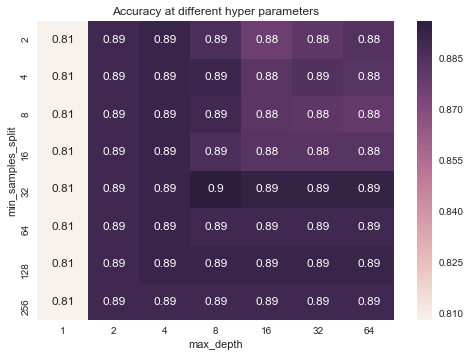

In [8]:
visualizations.plot_hyper_parameters(gs)

In [9]:
t = DecisionTreeClassifier(max_depth=8, min_samples_split=32)
visualizations.plot_data(model=t, 
                         data=data, 
                         feature1='a', 
                         feature2='b', 
                         target='c', 
                         out_of_sample=True, 
                         probabilities=False)